In [2]:
%matplotlib inline
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import json
import gff3_parsing
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import glob
import statsmodels.stats.multitest as multi

# Stats/Visualization for single bacteria virus pair

In [ ]:
host_ids = [36809,\
           717959,\
           305,\
           1590,\
           435591,\
           90371,\
           1314,\
           357276,\
           657318,\
           1639,\
           1428,\
           470,\
           573,\
           1280,\
           287,\
           562,\
           28450]

In [20]:
host_id = 562
p_values = []
viral_means = []
viral_ids = []
sep = "\t"

host_df = pd.read_csv("../Data/host_genomes/{}.clean.tsv".format(host_id), sep = sep)
host_mean = np.mean(host_df["energy_binding"])
# host_mean = host_df["energy_binding"].mean()
print(host_df.shape)
for tsv_file in glob.glob("../Data/{}_rep_viruses/*.clean.tsv".format(host_id)):
    viral_df = pd.read_csv(tsv_file, sep = sep)
    viral_ids.append(tsv_file.split('rep_viruses/')[1].split('.')[0])
    rstat, p_value = stats.ranksums(host_df["energy_binding"], viral_df["energy_binding"])
    p_values.append(p_value)
    viral_means.append(np.mean(viral_df["energy_binding"]))

(4059, 15)


In [ ]:
viral_df.columns

In [30]:
p_values

[0.09680319614737448,
 0.028346074552754164,
 2.3689805306475174e-07,
 0.041289354740674106,
 0.0014417614720707884,
 0.17538794276817893,
 0.0053464801475163895,
 0.5858006529296159,
 0.4355309243602361,
 0.008678338251945389,
 0.082745791540503,
 0.24614050269975773,
 0.17948609338969568,
 0.38091435174274013,
 0.08670503089318768,
 0.2463684894616417,
 0.012405564242735,
 0.026007944520414234,
 0.14058342876449406,
 0.04894388488464023,
 0.08147077969617582,
 0.07914384034534305,
 0.5664824796249146,
 0.007136614423361279,
 6.130926649154322e-08,
 0.007847156539506515,
 0.14181184025895918,
 0.0858137138740207,
 0.001276974028641102,
 0.4205433563116907,
 0.4322776237839515,
 0.0005434874239263997,
 0.15476621879341476,
 0.3246779521979868,
 9.654735230545087e-10,
 0.2927758536963825,
 0.7961565082963973,
 0.02891324070536788,
 0.0002339567981774134,
 0.02071883768945498,
 7.479675263745425e-12,
 0.1875656230065018,
 0.36782087231654104,
 0.5639542322216697,
 0.3777664142102961,
 9.

In [ ]:
sep = "\t"
host_means =[]
viral_ids = []
p_values = []
viral_means = []
host_ids_final = []

for host_id in host_ids:
    
    df = pd.read_csv('../Data/host_genomes/{}.clean.tsv'.format(host_id), sep = sep)
    host_avg = np.mean(df['energy_binding'])
    host_means.append(host_avg)
    
    for tsv_file in glob.glob('../Data/{}_rep_viruses/*.clean.tsv'.format(host_id)):
        
        host_ids_final.append(host_id)
        df_2 = pd.read_csv(tsv_file, sep = sep)
        viral_ids.append(tsv_file.split('rep_viruses/')[1].split('.')[0])
        rstat, p_value = stats.ranksums(df["energy_binding"], df_2["energy_binding"])
        p_values.append(p_value)
        viral_means.append(np.mean(df_2["energy_binding"]))


In [ ]:
# viruses_df = pd.DataFrame(columns = ['virus_id','host_id', 'mean_rbs_energy','p_value'])
# hosts_df = pd.DataFrame(columns = ['host_id', 'mean_rbs_energy'])

viruses_df = pd.DataFrame()
viruses_df['virus_id'] = viral_ids
viruses_df['host_id'] = host_ids_final
viruses_df['mean_rbs_energy'] = viral_means
viruses_df['rs_p_value'] = p_values



hosts_df = pd.DataFrame()
hosts_df['host_id'] = host_ids
hosts_df['mean_rbs_energy'] = host_means

viruses_df

# Export dfs as tsv

In [ ]:
location = '../Data/compiled_tsvs/'
viruses_df.to_csv(location + 'all_viruses.tsv', sep = '\t')
hosts_df.to_csv(location + 'all_hosts.tsv', sep = '\t')

In [ ]:
hosts_df

In [ ]:
ecoli_df = pd.DataFrame(columns = ['virus_id','host_id', 'mean_rbs_energy','p_value'])

In [ ]:
# ecoli_df['virus_id'] = viral_ids
# ecoli_df['host_id'] = host_id
# ecoli_df['mean_rbs_energy'] = viral_means
# ecoli_df['p_value'] = p_values
# ecoli_df

**Proportion of viruses that are significantly different than host**

In [ ]:
significant_pvalues = []
for p in p_values:
    if p <= 0.01:
        significant_pvalues.append(p)
        
print(len(significant_pvalues), len(p_values), len(significant_pvalues)/len(p_values))


**Visualizing p-values**

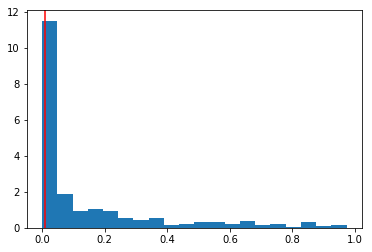

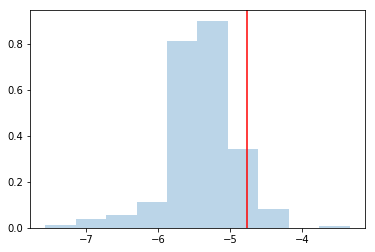

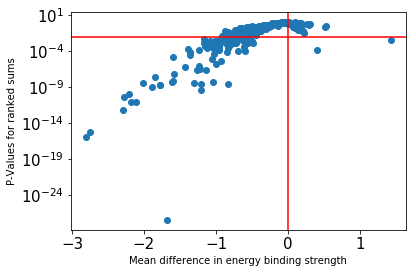

In [21]:
#2
fig, ax = plt.subplots()
ax.hist(p_values, 20, density = True)
ax.axvline(0.01, color = "r")


fig2, ax2 = plt.subplots()
ax2.hist(viral_means, density= True, alpha = 0.3)
ax2.axvline(host_mean, color = "r")

fig3, ax = plt.subplots()
ax.set_ylabel("P-Values for ranked sums")
ax.set_xlabel("Mean difference in energy binding strength")
ax.tick_params(labelsize = 15)
ax.semilogy(np.array(viral_means)-host_mean,p_values, marker = "o", linestyle = "")
ax.axvline(0, color = "r")
ax.axhline(.01, color = "r")

**Correcting for multiple hypotheses**

In [ ]:
truth_array, corrected_p_values = multi.fdrcorrection(p_values)

fig, ax = plt.subplots()
ax.hist(corrected_p_values, 20, density = True)
ax.axvline(0.01, color = "r")


significant_pvalues = []
for p in corrected_p_values:
    if p <= 0.01:
        significant_pvalues.append(p)
        
print(len(significant_pvalues), len(corrected_p_values), len(significant_pvalues)/len(corrected_p_values))

In [ ]:
stats.combine_pvalues(p_values)

# Stats/Visualization for all bacteria

In [4]:
all_hosts = pd.read_csv('../Data/compiled_tsvs/all_hosts.tsv', sep = '\t', index_col = 0)
all_viruses = pd.read_csv('../Data/compiled_tsvs/all_viruses.tsv', sep = '\t', index_col = 0)

In [33]:
all_hosts.head()
all_viruses.tail()


,virus_id,host_id,mean_rbs_energy,rs_p_value
1311,1351,28450,-5.203407,0.012656
1312,8114,28450,-4.161429,0.382253
1313,9213,28450,-4.764510,0.499962
1314,8165,28450,-4.718269,0.617443
1315,7687,28450,-5.176538,0.074937


In [ ]:
for virus_id in all_viruses['virus_id']:
    

In [28]:
id_562 = all_viruses['host_id'] == 562
id_562 = all_viruses[id_562]
id_562

,virus_id,host_id,mean_rbs_energy,rs_p_value
910,6088,562,-5.265690,9.680320e-02
911,6277,562,-5.392679,2.834607e-02
912,2454,562,-6.037500,2.368981e-07
913,3758,562,-5.307647,4.128935e-02
914,6382,562,-5.782353,1.441761e-03
915,197,562,-4.641353,1.753879e-01
916,2797,562,-5.574687,5.346480e-03
917,710,562,-4.987333,5.858007e-01
918,3861,562,-5.116984,4.355309e-01
919,2440,562,-5.495200,8.678338e-03


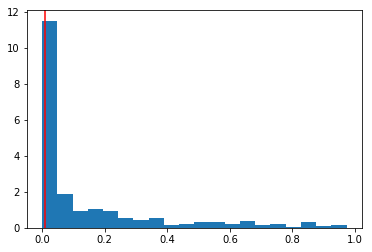

In [31]:
fig, ax = plt.subplots()
ax.hist(id_562['rs_p_value'], 20, density = True)
ax.axvline(0.01, color = "r")

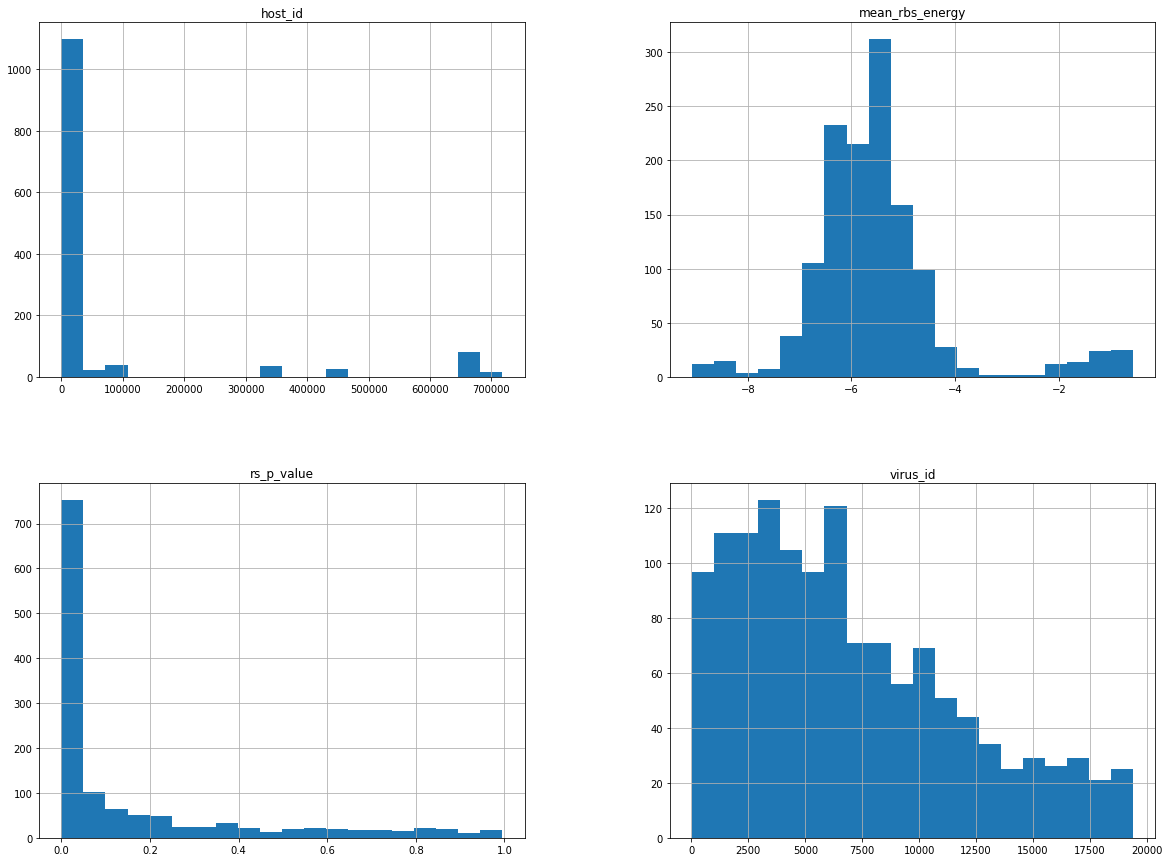

In [32]:
all_viruses.hist(bins = 20, figsize= (20,15))
plt.show()